In [12]:
library(qvalue)
library(dplyr)
library(ggplot2)

In [13]:
Giordanos_selection = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/metadata/ensembl_gene/Ensembl_75_Gene_CV_quant5.txt"
G_file = read.csv(Giordanos_selection, sep = "\t")
nrow(G_file)
head(G_file,2)

[1] 21592

,gene,mean,std,CV,quartile_cv
2,ENSG00000227232,3.1805905,3.6232403,1.139172,2
3,ENSG00000243485,0.2003178,0.8649483,4.317881,3


In [14]:
bulk_matched_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_PCA20_88_206/"

In [15]:
res = read.csv(paste0(bulk_matched_folder,"qtl_results_all.txt"), sep = "\t")
nrow(res)

[1] 16691457

In [16]:
bulk_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkTotal_PCA20/"

In [17]:
res_all = read.csv(paste0(bulk_folder,"qtl_results_all.txt"), sep = "\t")
nrow(res_all)

[1] 18974762

In [18]:
leads = read.csv(paste0(bulk_matched_folder,"top_qtl_results_all.txt"), sep = "\t")
nrow(leads)

[1] 43103

In [19]:
df0 = leads
df0 <- df0[-which(duplicated(df0$feature_id)),]
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))
df3 = df1[df1$q_value < 0.05,]
df5 = inner_join(df3, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df5 <- df5[-which(duplicated(df5$feature_id)),]
nrow(df5)

nrow(df5[(df5$p_value.bulk < 0.05 & 
         (df5$beta.sc*df5$beta.bulk)>0),])
nrow(df5[(df5$p_value.bulk < 0.05),])

[1] 42791

[1] 20336

[1] 3517

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 3499

[1] 3357

[1] 3357

In [20]:
leads_all = read.csv(paste0(bulk_folder,"top_qtl_results_all.txt"), sep = "\t")
nrow(leads_all)

[1] 49916

In [21]:
df0 = leads_all
df0 <- df0[-which(duplicated(df0$feature_id)),]
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

[1] 49554

[1] 20541

[1] 13869

In [22]:
df2 = df1[df1$q_value < 0.05,]
nrow(df2)

[1] 13869

In [23]:
##### Mean
mean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/mean/"
my_folder = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs
# my_folder = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206_baynorm/") # baynorm, 20PCs

In [24]:
res_mean = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [25]:
##### Sum
sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/sum/"
my_folder = paste0(sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

In [26]:
res_sum = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [27]:
df3 = inner_join(df2, res_mean, by = c("snp_id","feature_id"), suffix = c(".bulk",".sc"))
df3 <- df3[-which(duplicated(df3$feature_id)),]
nrow(df3)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 13869

In [28]:
df3 = df3[order(df3$q_value),]
df3$nom_sign = df3$p_value.sc < 0.05
df3$same_effect_sign = (df3$beta.sc * df3$beta.bulk) > 0
head(df3,2)

,snp_id,p_value.bulk,beta.bulk,beta_se.bulk,empirical_feature_p_value.bulk,feature_chromosome.bulk,feature_start.bulk,feature_end.bulk,n_samples.bulk,n_e_samples.bulk,...,alpha_param.sc,beta_param.sc,snp_chromosome.sc,snp_position.sc,assessed_allele.sc,call_rate.sc,maf.sc,hwe_p.sc,nom_sign,same_effect_sign
12067,17_43704031_C_A,1.731882e-124,-1.240223,0.05226204,8.299205e-142,17,43578685,43627701,810,526,...,0.8656900,19.26625,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE
12065,17_43704031_C_A,1.919183e-123,-1.209482,0.05118531,7.107490e-130,17,43697694,43725582,810,526,...,0.4735916,66.78895,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE


In [29]:
TPR = c()
tp = 0
for (i in 1:nrow(df3)){
    if (df3$nom_sign[i] == TRUE & df3$same_effect_sign[i] == TRUE){tp = tp+1}
#     if (df3$nom_sign[i] == TRUE){tp = tp+1}
    TPR[i] = tp/i
}

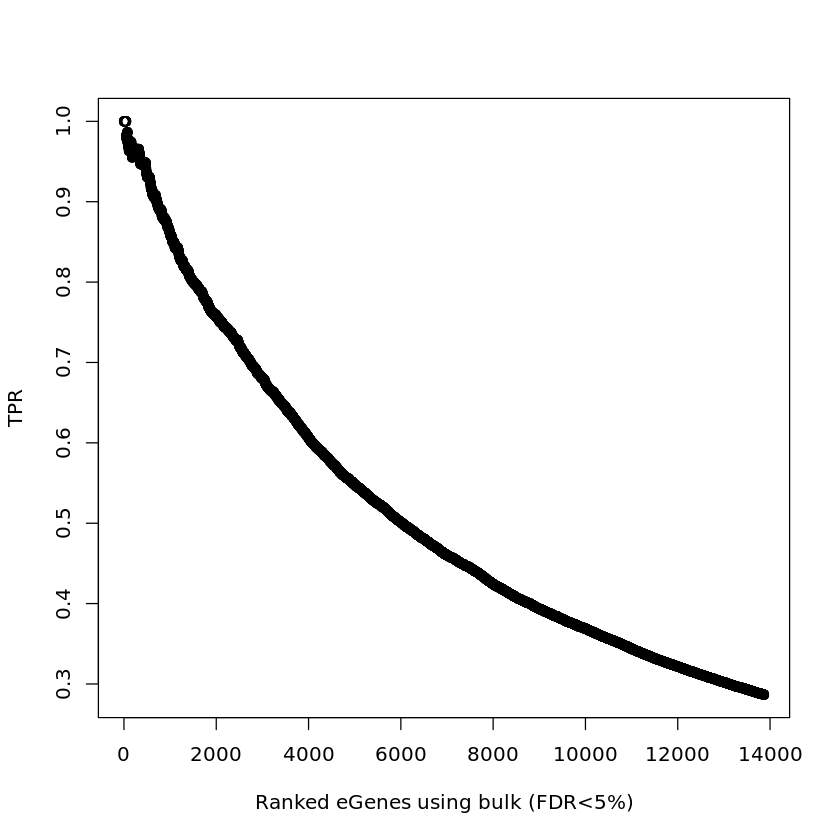

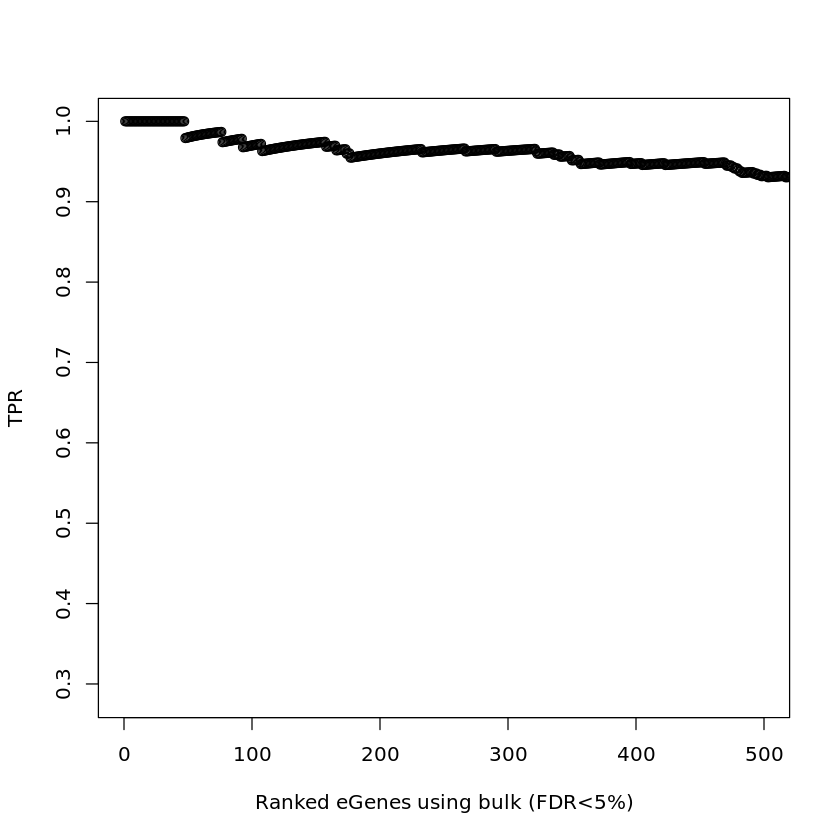

In [30]:
# hist(TPR)
plot(1:nrow(df3),TPR, xlab = "Ranked eGenes using bulk (FDR<5%)")
plot(1:nrow(df3),TPR, xlim = c(0,500), xlab = "Ranked eGenes using bulk (FDR<5%)")

In [68]:
# nrow(df3)
df_mean = data.frame(ranked_genes = 1:nrow(df3), tpr = TPR, method = "mean")
tail(df_mean)

,ranked_genes,tpr,method
8746,8746,0.3637091,mean
8747,8747,0.3636675,mean
8748,8748,0.3636260,mean
8749,8749,0.3636987,mean
8750,8750,0.3636571,mean
8751,8751,0.3636156,mean


In [49]:
df4 = inner_join(df2, res_sum, by = c("snp_id","feature_id"), suffix = c(".bulk",".sc"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 8609

In [50]:
df4 = df4[order(df4$q_value),]
df4$nom_sign = df4$p_value.sc < 0.05
df4$same_effect_sign = (df4$beta.sc * df4$beta.bulk) > 0
head(df4,2)

,snp_id,p_value.bulk,beta.bulk,beta_se.bulk,empirical_feature_p_value.bulk,feature_chromosome.bulk,feature_start.bulk,feature_end.bulk,n_samples.bulk,n_e_samples.bulk,...,alpha_param.sc,beta_param.sc,snp_chromosome.sc,snp_position.sc,assessed_allele.sc,call_rate.sc,maf.sc,hwe_p.sc,nom_sign,same_effect_sign
556,6_86387888_G_T,1.388048e-122,1.210736,0.05142060,1.470169e-115,6,86370710,86388451,813,527,...,0.5095164,58.80131,6,86387888,T,1,0.4602273,0.6671999,TRUE,TRUE
7979,5_138100042_T_C,5.688202e-103,-1.468786,0.06816765,4.086968e-102,5,138080123,138088998,813,527,...,0.6777317,20.71732,5,138100042,C,1,0.2159091,0.3404666,TRUE,TRUE


In [51]:
TPR = c()
tp = 0
for (i in 1:nrow(df4)){
    if (df4$nom_sign[i] == TRUE & df4$same_effect_sign[i] == TRUE){tp = tp+1}
#     if (df3$nom_sign[i] == TRUE){tp = tp+1}
    TPR[i] = tp/i
}

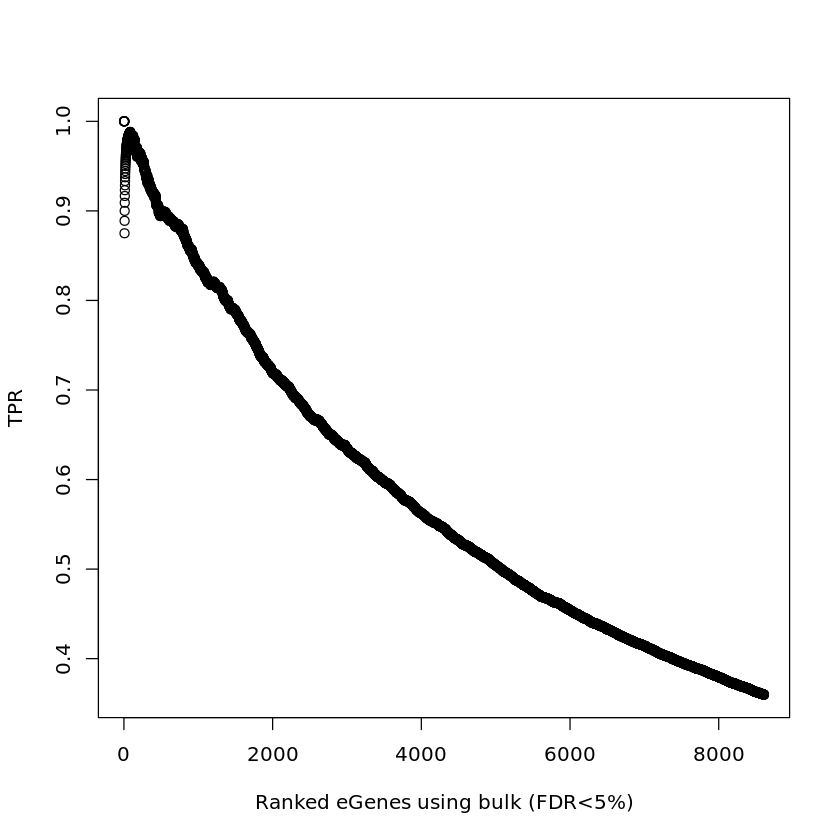

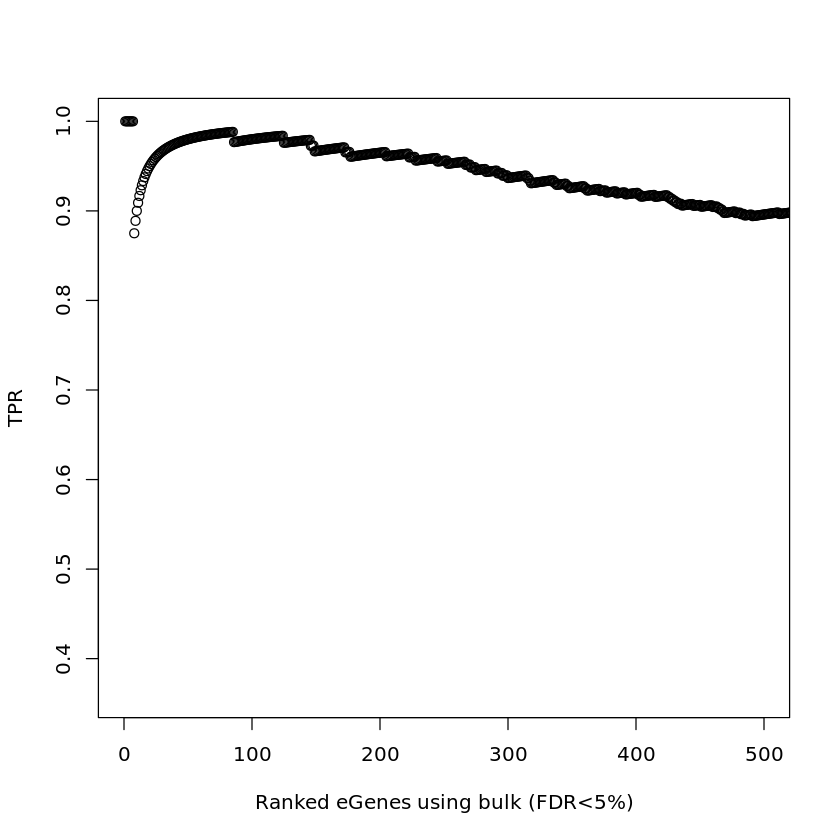

In [52]:
# hist(TPR)
plot(1:nrow(df4),TPR, xlab = "Ranked eGenes using bulk (FDR<5%)")
plot(1:nrow(df4),TPR, xlim = c(0,500), xlab = "Ranked eGenes using bulk (FDR<5%)")

In [66]:
# nrow(df4)
df_sum = data.frame(ranked_genes = 1:nrow(df4), tpr = TPR, method = "sum")
tail(df_sum)

,ranked_genes,tpr,method
8604,8604,0.3598326,sum
8605,8605,0.3597908,sum
8606,8606,0.3598652,sum
8607,8607,0.3599396,sum
8608,8608,0.3598978,sum
8609,8609,0.3598560,sum


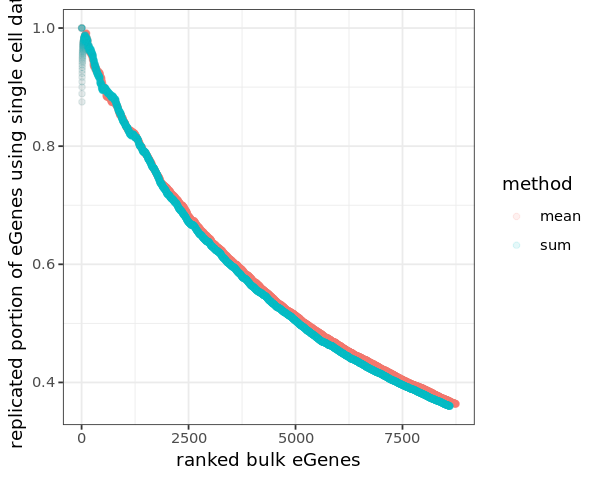

Warning message:
“Removed 16360 rows containing missing values (geom_point).”

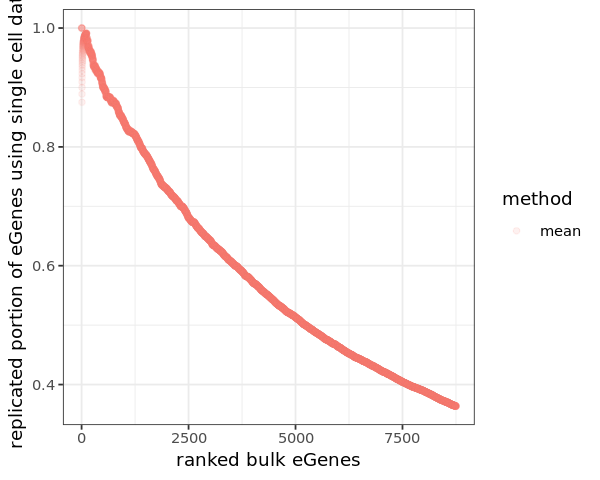

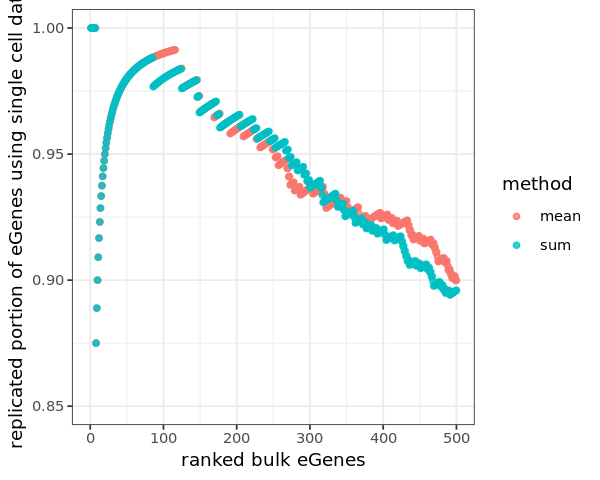

In [70]:
options(repr.plot.width = 5, repr.plot.height = 4)
df_to_plot = rbind(df_mean, df_sum)
ggplot(df_to_plot, aes(x = ranked_genes, y = tpr, colour = method)) + geom_point(alpha = 0.1) + 
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")
ggplot(df_to_plot[df_to_plot$method == "mean",], aes(x = ranked_genes, y = tpr, colour = method)) + geom_point(alpha = 0.1) + 
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")
ggplot(df_to_plot, aes(x = ranked_genes, y = tpr, colour = method)) + geom_point(alpha = 0.8) + xlim(c(0,500)) + ylim(c(0.85,1)) +
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")

In [58]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [59]:
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

df3 = df1[df1$q_value < 0.05,]
nrow(df3)

[1] 50425

[1] 20545

[1] 2074

[1] 2074

In [ ]:
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

df3 = df1[df1$q_value < 0.05,]
nrow(df3)

In [52]:
length(unique(df3$feature_id))
length(unique(df3$feature_id)[unique(df3$feature_id) %in% unique(res$feature_id)])
length(unique(df3$feature_id)[unique(df3$feature_id) %in% unique(res_all$feature_id)])

[1] 2081

[1] 2071

[1] 2081

In [17]:
df4 = inner_join(df3, res, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),])
nrow(df4[(df4$p_value.bulk < 0.05),])

df5 = inner_join(df3, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df5 <- df5[-which(duplicated(df5$feature_id)),]
nrow(df5)

nrow(df5[(df5$p_value.bulk < 0.05 & 
         (df5$beta.sc*df5$beta.bulk)>0),])
nrow(df5[(df5$p_value.bulk < 0.05),])

[1] 50425

[1] 20545

[1] 2081

[1] 2081

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 2071

[1] 1197

[1] 1235

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 2075

[1] 1463

[1] 1546

In [18]:
##### Total Mean

In [19]:
total_mean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/"

In [20]:
my_folder = paste0(total_mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [21]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [22]:
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

df3 = df1[df1$q_value < 0.05,]
nrow(df3)

[1] 48583

[1] 19877

[1] 1363

[1] 1363

In [23]:
df4 = inner_join(df3, res, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),])
nrow(df4[(df4$p_value.bulk < 0.05),])

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1356

[1] 894

[1] 920

In [24]:
df5 = inner_join(df3, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df5 <- df5[-which(duplicated(df5$feature_id)),]
nrow(df5)

nrow(df5[(df5$p_value.bulk < 0.05 & 
         (df5$beta.sc*df5$beta.bulk)>0),])
nrow(df5[(df5$p_value.bulk < 0.05),])

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1359

[1] 1038

[1] 1106

In [25]:
##### Median

In [26]:
median_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/median/"

In [27]:
my_folder = paste0(median_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [28]:
df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
df <- df[order(df$empirical_feature_p_value, df$p_value ),]
df0 <- df[-which(duplicated(df$feature_id)),]
# nrow(df0)

In [29]:
# df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
# median_genes = unique(df0$feature_id)
# length(median_genes)

In [30]:
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

df3 = df1[df1$q_value < 0.05,]
nrow(df3)

df4 = inner_join(df3, res, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),])
nrow(df4[(df4$p_value.bulk < 0.05),])

df5 = inner_join(df3, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df5 <- df5[-which(duplicated(df5$feature_id)),]
nrow(df5)

nrow(df5[(df5$p_value.bulk < 0.05 & 
         (df5$beta.sc*df5$beta.bulk)>0),])
nrow(df5[(df5$p_value.bulk < 0.05),])

[1] 13628

[1] 13567

[1] 1530

[1] 1530

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1530

[1] 733

[1] 767

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1524

[1] 924

[1] 997

In [31]:
##### Sum

sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/sum/"

my_folder = paste0(sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

In [34]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [35]:
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

df3 = df1[df1$q_value < 0.05,]
nrow(df3)

[1] 50427

[1] 20545

[1] 1598

[1] 1598

In [36]:
df4 = inner_join(df3, res, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),])
nrow(df4[(df4$p_value.bulk < 0.05),])

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1581

[1] 1022

[1] 1051

In [37]:
df5 = inner_join(df3, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df5 <- df5[-which(duplicated(df5$feature_id)),]
nrow(df5)

nrow(df5[(df5$p_value.bulk < 0.05 & 
         (df5$beta.sc*df5$beta.bulk)>0),])
nrow(df5[(df5$p_value.bulk < 0.05),])

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1584

[1] 1195

[1] 1261

In [38]:
##### Total Sum

In [39]:
total_sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totsum/"

In [40]:
my_folder = paste0(total_sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

In [41]:
df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
df <- df[order(df$empirical_feature_p_value, df$p_value ),]
df0 <- df[-which(duplicated(df$feature_id)),]
# nrow(df0)
length(unique(df0$feature_id))

[1] 50429

In [42]:
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

df3 = df1[df1$q_value < 0.05,]
nrow(df3)

df4 = inner_join(df3, res, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),])
nrow(df4[(df4$p_value.bulk < 0.05),])

df5 = inner_join(df3, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df5 <- df5[-which(duplicated(df5$feature_id)),]
nrow(df5)

nrow(df5[(df5$p_value.bulk < 0.05 & 
         (df5$beta.sc*df5$beta.bulk)>0),])
nrow(df5[(df5$p_value.bulk < 0.05),])

[1] 50429

[1] 20545

[1] 1291

[1] 1291

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1283

[1] 846

[1] 874

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1286

[1] 982

[1] 1049

In [455]:
my_folder = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs
my_folder = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206_baynorm/") # baynorm, 20PCs

In [456]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]

In [457]:
df0 = df0[df0$feature_id %in% common_genes,]
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = "BH")
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df2 = df0[df0$feature_id %in% A_file$gene,]
length(unique(df2$feature_id))
df2$BH_fdr = p.adjust(df2$empirical_feature_p_value, method = "BH")
length(unique(df2[df2$BH_fdr < 0.05,'feature_id']))

[1] 48570

[1] 19876

[1] 1955

[1] 10408

[1] 1346

In [326]:
# df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
totsum_genes = unique(df0$feature_id)
length(totsum_genes)

[1] 50429

In [448]:
genes0 = mean_genes[mean_genes %in% totmean_genes]
length(genes0)
genes1 = genes0[genes0 %in% sum_genes]
length(genes1)
genes2 = genes1[genes1 %in% totsum_genes]
length(genes2)
common_genes = genes2
genes3 = genes2[genes2 %in% median_genes]
length(genes3)
# common_genes = genes3

[1] 48579

[1] 48570

[1] 48570

[1] 13177

In [436]:
length(common_genes)
length(common_genes[common_genes %in% G_file$gene])
length(common_genes[common_genes %in% A_file$gene])

[1] 13177

[1] 13117

[1] 9886

In [426]:
# df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 = df0[df0$feature_id %in% common_genes,]
length(unique(df0$feature_id))

[1] 48570

In [427]:
# df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
# df <- df[order(df$empirical_feature_p_value, df$p_value ),]
# df0 <- df[-which(duplicated(df$feature_id)),]
# nrow(df0)

In [428]:
# totsum_genes = df0$feature_id

In [429]:
# length(totmean_genes)
# length(totmean_genes[totmean_genes %in% common_genes])

In [430]:
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))

[1] 19876

In [431]:
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = "BH")
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
# c(nrow(df1[df1$BH_fdr < 0.05,]), nrow(df1[df1$BH_fdr < 0.05,])/nrow(df1))

[1] 1433

In [432]:
df2 = df0[df0$feature_id %in% A_file$gene,]
length(unique(df2$feature_id))

[1] 10408

In [433]:
df2$BH_fdr = p.adjust(df2$empirical_feature_p_value, method = "BH")
length(unique(df2[df2$BH_fdr < 0.05,'feature_id']))
# c(nrow(df2[df2$BH_fdr < 0.05,]), nrow(df2[df2$BH_fdr < 0.05,])/nrow(df2))

[1] 1045